#1) Creating a Table with links 

In [1]:
import pandas as pd


In [2]:
#creating a list of dates 

date1 = pd.date_range(start="2019-01-01",end="2022-12-31").strftime('%Y-%m-%d')

In [3]:
#creating a dataframe

df = pd.DataFrame(date1)

# creating tables with parts of link (same amount of rows as rows in date table)

df1 = pd.DataFrame().reindex_like(df)
df2 = pd.DataFrame().reindex_like(df)

df1[0] = "https://admn5015-340805.uc.r.appspot.com/"

df2[0] = ".html"

In [4]:
# merging

link_df = pd.concat([df1, df, df2], axis=1)

In [5]:
link_df.columns = ['link1', 'date', 'link2']
link_df

,link1,date,link2
0,https://admn5015-340805.uc.r.appspot.com/,2019-01-01,.html
1,https://admn5015-340805.uc.r.appspot.com/,2019-01-02,.html
2,https://admn5015-340805.uc.r.appspot.com/,2019-01-03,.html
3,https://admn5015-340805.uc.r.appspot.com/,2019-01-04,.html
4,https://admn5015-340805.uc.r.appspot.com/,2019-01-05,.html
...,...,...,...
1456,https://admn5015-340805.uc.r.appspot.com/,2022-12-27,.html
1457,https://admn5015-340805.uc.r.appspot.com/,2022-12-28,.html
1458,https://admn5015-340805.uc.r.appspot.com/,2022-12-29,.html
1459,https://admn5015-340805.uc.r.appspot.com/,2022-12-30,.html


In [6]:
#creating links by merging columns

link_ready = link_df["link1"]+link_df["date"]+link_df["link2"]
pd.set_option('display.max_colwidth', -1)
link_ready



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


0       https://admn5015-340805.uc.r.appspot.com/2019-01-01.html
1       https://admn5015-340805.uc.r.appspot.com/2019-01-02.html
2       https://admn5015-340805.uc.r.appspot.com/2019-01-03.html
3       https://admn5015-340805.uc.r.appspot.com/2019-01-04.html
4       https://admn5015-340805.uc.r.appspot.com/2019-01-05.html
                                  ...                           
1456    https://admn5015-340805.uc.r.appspot.com/2022-12-27.html
1457    https://admn5015-340805.uc.r.appspot.com/2022-12-28.html
1458    https://admn5015-340805.uc.r.appspot.com/2022-12-29.html
1459    https://admn5015-340805.uc.r.appspot.com/2022-12-30.html
1460    https://admn5015-340805.uc.r.appspot.com/2022-12-31.html
Length: 1461, dtype: object

#2) Parcing the data from a website

In [7]:
from bs4 import BeautifulSoup

from lxml import etree

import urllib.request as urllib2




# Initialize parser

parser = etree.HTMLParser()

In [8]:
#scraping loop + saving everything in df

number = 0

for link in link_ready:
  webpage = urllib2.urlopen(link, timeout=10)
  html = webpage.read().decode(encoding="utf-8")
  soup = BeautifulSoup(html, "html.parser")
  df.loc[number, ['price']] = soup.find("td", {"id": "price"}).text
  df.loc[number, ['likes']] = soup.find("td", {"id": "likes"}).text
  df.loc[number, ['dislikes']] = soup.find("td", {"id": "dislikes"}).text
  df.loc[number, ['followers']] = soup.find("td", {"id": "followers"}).text

  number = number + 1 

In [9]:
#naming columns

df.columns = ["date", "price", "likes", "dislikes", "followers"]

In [10]:
#data cleaning

df["price"] = df["price"].str.replace('$', '')
df["price"] = df["price"].str.replace(' CAD', '')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,price,likes,dislikes,followers
0,2019-01-01,999.47,9001,401,15002
1,2019-01-02,998.94,9002,402,15004
2,2019-01-03,998.41,9003,403,15006
3,2019-01-04,997.88,9004,404,15008
4,2019-01-05,997.35,9005,405,15010
...,...,...,...,...,...
1456,2022-12-27,22452.8,10924,1496,17468
1457,2022-12-28,22452.8,10924,1496,17468
1458,2022-12-29,22452.8,10924,1496,17468
1459,2022-12-30,22452.8,10924,1496,17468


In [11]:
df.columns

Index(['date', 'price', 'likes', 'dislikes', 'followers'], dtype='object')

In [12]:
# changing data type from object to float

df[['price', 'likes', 'dislikes', 'followers']] = df[['price', 'likes', 'dislikes', 'followers']].astype(str).astype(float)

In [17]:
#Saving the dataframe as a CSV
from google.colab import files

df.to_csv(r"scraped_results.csv",index=False)
files.download('scraped_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1461 non-null   object 
 1   price      1461 non-null   float64
 2   likes      1461 non-null   float64
 3   dislikes   1461 non-null   float64
 4   followers  1461 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [19]:
#Gregorian ordinal of the date, so we can use that in regression

import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)

#changing date datatype

df['date']=df['date'].astype(str).astype(int)

In [20]:
df

,date,price,likes,dislikes,followers
0,737060,999.47,9001.0,401.0,15002.0
1,737061,998.94,9002.0,402.0,15004.0
2,737062,998.41,9003.0,403.0,15006.0
3,737063,997.88,9004.0,404.0,15008.0
4,737064,997.35,9005.0,405.0,15010.0
...,...,...,...,...,...
1456,738516,22452.80,10924.0,1496.0,17468.0
1457,738517,22452.80,10924.0,1496.0,17468.0
1458,738518,22452.80,10924.0,1496.0,17468.0
1459,738519,22452.80,10924.0,1496.0,17468.0


#3) Regression

In [ ]:
import time

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt



from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lars

from sklearn.linear_model import TheilSenRegressor

from sklearn.linear_model import HuberRegressor

from sklearn.linear_model import PassiveAggressiveRegressor

from sklearn.linear_model import ARDRegression

from sklearn.linear_model import BayesianRidge

from sklearn.linear_model import ElasticNet

from sklearn.linear_model import OrthogonalMatchingPursuit

from sklearn.svm import SVR

from sklearn.svm import NuSVR

from sklearn.svm import LinearSVR

from sklearn.kernel_ridge import KernelRidge

from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.describe().T

#showing numeric 

,count,mean,std,min,25%,50%,75%,max
date,1461.0,737790.000000,421.898685,737060.00,737425.00,737790.00,738155.0,738520.0
price,1461.0,11167.313854,8574.937328,855.31,1362.78,14193.74,22452.8,22452.8
likes,1461.0,10125.540041,662.219848,9001.00,9642.00,10283.00,10924.0,10924.0
dislikes,1461.0,1085.281314,362.438436,401.00,766.00,1131.00,1496.0,1496.0
followers,1461.0,16517.315537,824.037689,15002.00,15824.00,16646.00,17468.0,17468.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1461 non-null   int64  
 1   price      1461 non-null   float64
 2   likes      1461 non-null   float64
 3   dislikes   1461 non-null   float64
 4   followers  1461 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


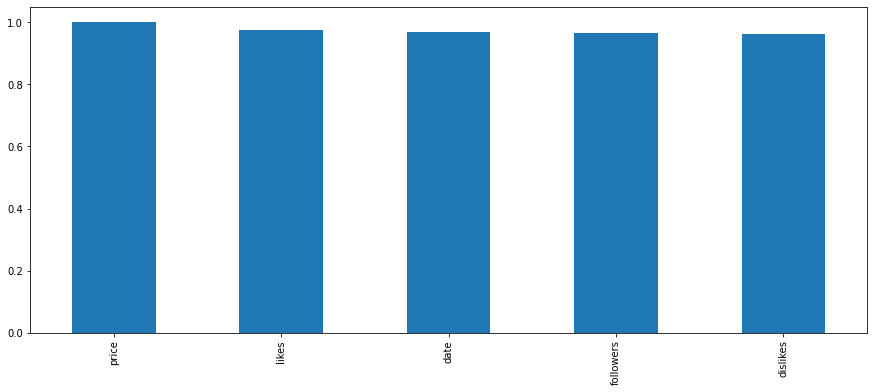

In [ ]:
# Plot data

plt.figure(figsize=(15,6))

bars = df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

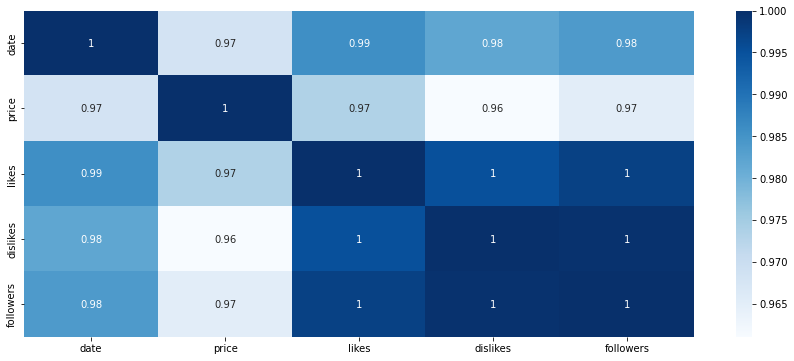

In [ ]:
# Create a heatmap



plt.figure(figsize=(15,6))

heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

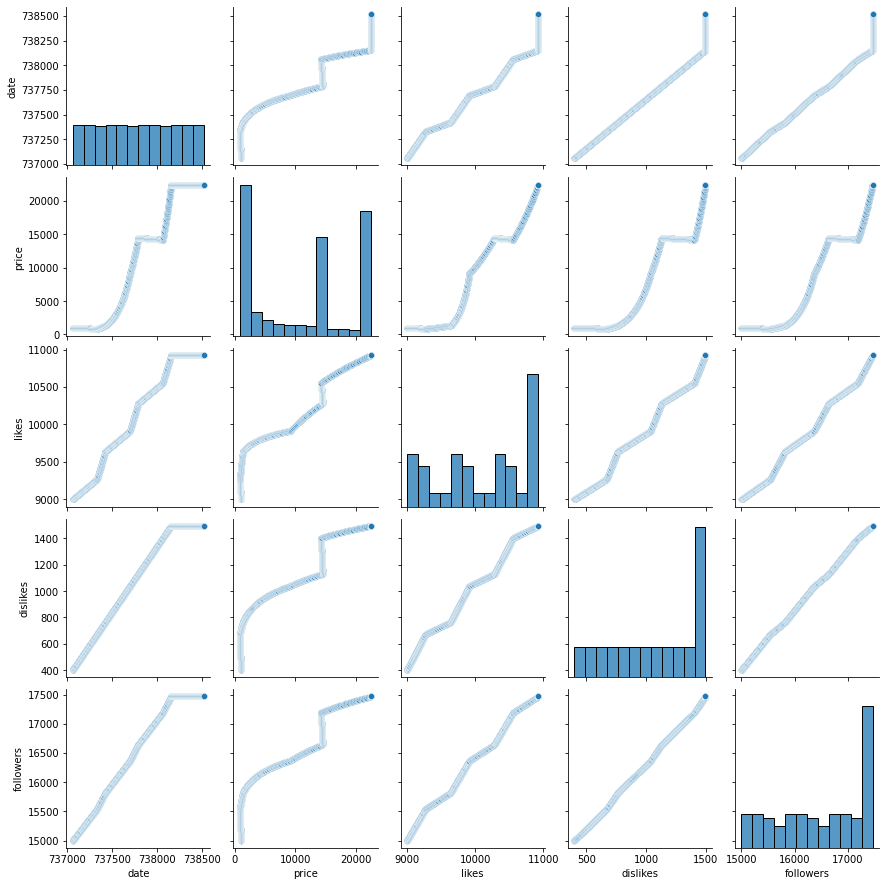

In [ ]:
sns.pairplot(df)

In [ ]:
# Create traning and testing datasets



x = df[['date', 'likes', 'dislikes', 'followers']]

y = df['price']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# Identify the best model



regressors = {

    "XGBRegressor": XGBRegressor(silent=True),

    "RandomForestRegressor": RandomForestRegressor(),

    "DecisionTreeRegressor": DecisionTreeRegressor(),

    "GaussianProcessRegressor": GaussianProcessRegressor(),

    "SVR": SVR(),

    "NuSVR": NuSVR(),

    "Ridge":Ridge(),

    "Lars": Lars(),

    "TheilSenRegressor": TheilSenRegressor(),

    "HuberRegressor": HuberRegressor(),

    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),

    "ARDRegression": ARDRegression(),

    "BayesianRidge": BayesianRidge(),

    "ElasticNet": ElasticNet(),

    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),

}

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])



for key in regressors:



    print('*',key)



    start_time = time.time()



    regressor = regressors[key]

    model = regressor.fit(x_train, y_train)

    y_pred = model.predict(x_test)



    scores = cross_val_score(model,

                             x_train,

                             y_train,

                             scoring="neg_mean_squared_error",

                             cv=10)



    row = {'model': key,

           'run_time': format(round((time.time() - start_time)/60,2)),

           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))

    }



    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* TheilSenRegressor


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.624e+09, tolerance: 7.993e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.445e+09, tolerance: 7.208e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
# Order model results



df_models.head(30).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
1,RandomForestRegressor,0.05,22
2,DecisionTreeRegressor,0.0,34
0,XGBRegressor,0.01,49
6,Ridge,0.0,1790
7,Lars,0.0,1790
11,ARDRegression,0.0,1790
12,BayesianRidge,0.0,1790
13,ElasticNet,0.0,1790
8,TheilSenRegressor,0.12,1891
14,OrthogonalMatchingPursuit,0.0,2028


In [ ]:
# Evaluate the best model

regressor = RandomForestRegressor()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)


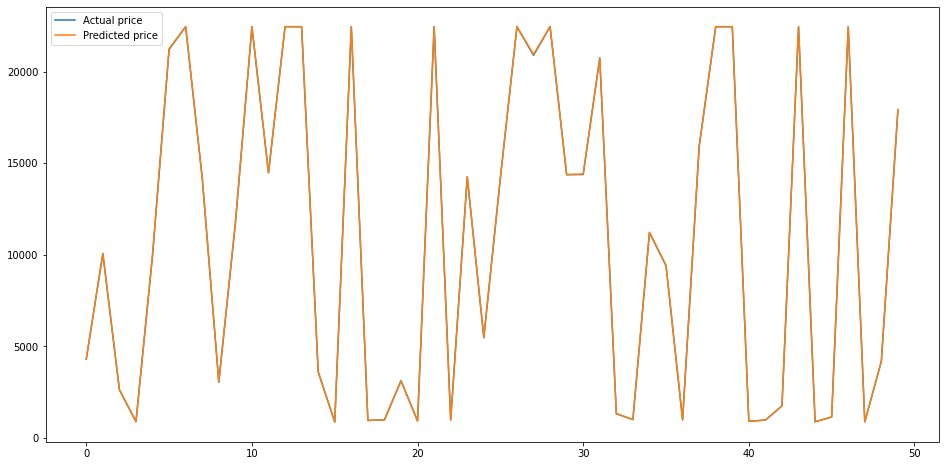

In [ ]:
test = pd.DataFrame({'Predicted price':y_pred, 'Actual price':y_test})

fig= plt.figure(figsize=(16,8))

test = test.reset_index()

test = test.drop(['index'],axis=1)

plt.plot(test[0:50])

plt.legend(['Actual price','Predicted price'])

In [ ]:
# Predict a new price amount


temp_data = {   'date' : [738521],

                'likes' : [10000],

                'dislikes' : [500],

                'followers' : [17000]

        }



df_price_input = pd.DataFrame(temp_data, columns = ['date', 'likes', 'dislikes', 'followers'])



df_price_prediction_result = model.predict(df_price_input)



df_price_prediction_result

array([11476.3281])